In [1]:
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

#hide warnings
import warnings
warnings.filterwarnings("ignore")

## Statistical Testing

### Load Dataset

In [2]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: d:\Projects\repos\tu060\tests


In [3]:
#path = './../datasets/'
path = './../sim-notebook/'

In [4]:
#files = ['2023_6_10_16_17_17_atari_space_invaders.csv', '2023_6_11_00_40_56_atari_breakout.csv', '2023_6_11_01_43_35_atari_air_raid.csv', '2023_6_11_09_09_42_atari_asterix.csv', '2023_6_11_10_19_31_atari_bowling.csv', '2023_6_11_11_54_40_atari_aasteroids.csv', '2023_6_11_16_16_46_atari_demon_attack.csv', '2023_6_11_18_38_56_atari_freeway.csv', '2023_6_11_19_46_04_atari_gravitar.csv', '2023_6_11_21_07_40_atari_james_bond.csv', '2023_6_11_22_11_09_atari_pong.csv', '2023_6_11_23_14_08_ms_pac_man.csv', '2023_6_12_00_19_04_montezumas_revenge.csv', '2023_6_12_01_21_01_private_eye.csv', '2023_6_12_02_21_54_qbert.csv', '2023_6_12_03_20_59_sea_quest.csv', '2023_6_12_09_47_36_venture.csv', '2023_6_12_10_51_48wizard_of_wor.csv', '2023_6_12_13_19_31_yars_revenge.csv', '2023_6_12_15_05_14_zaxxon.csv', '2023_6_14_23_06_09_cart_pole.csv', '2023_6_14_23_20_07_addiction.csv', '2023_6_15_02_46_50_lunar_lander.csv']
files = ['reward_capacity.csv']

In [5]:
rw = 10
episodes = 200
label_mapping = {
    '1M': '1x10⁶',
    '500k': '5x10⁵',
    '100k': '1x10⁵',
    '50k': '5x10⁴',
    '10k': '1x10⁴',
    '5k': '5x10³',
    '1k': '1x10³',
    '500': '5x10²'
}

In [6]:
def statisticalTesting(file):
    #date = file.split('_')[0:6]  # Extract the date portion
    #date_string = '_'.join(date)  # Reconstruct the date string
    #title = file.replace(date_string + '_', '').replace('.csv', '')  # Remove the date portion from the original string # Remove the date and ".csv" extension
    #title = title.replace('_', ' ').capitalize()
    title = "Capacity Reward Boxplot"
    #print(title + " Sim")

    #import data
    df_rewards = pd.read_csv(file)
    print("Index: " + str(df_rewards.index))
    unique_capacities = df_rewards['capacity'].unique()
    num_unique_capacities = len(unique_capacities)
    p = []
    for c in range(num_unique_capacities):
        if c<1 or c == 4:
            p.append('#FFF380')
        else:
            p.append('#8FD9F6')
    
    #plot overlapping density plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed

    ax = sns.boxplot(x='capacity', y='reward', data=df_rewards, width=0.5,
                    palette=p, fliersize=1)  # Adjust fliersize as needed


    # Adding labels and title to the plot
    ax.set(ylabel='Average Reward/' + str(rw) + ' steps', xlabel='Experience Replay Capacity',
        title="Reward by Capacity for " + str(episodes) + " episodes of 20 Atari Games")  # Set labels and title for the axes

    #print boxplot to plot mean reward
    #ax = sns.boxplot(x='capacity', y='reward', data=df_rewards, color='#77B150', width=0.5).set(title=title.capitalize()) #+ ' Simulator: Box Plot of Rewards by Capacity Size'
    ax.set_xticklabels([label_mapping[label.get_text()] for label in ax.get_xticklabels()])
    plt.show()

    print("\nShapiro-Wilk test")
    # The Shapiro-Wilk test, tests the null hypothesis that the data was drawn from a normal distribution this is an ANOVA assumption
    shapiro_test = stats.shapiro(df_rewards.reward.values) #(p 5%)
    print(shapiro_test)
    print(shapiro_test.statistic)
    print(shapiro_test.pvalue) #reject if less than 0.05

    if(shapiro_test.pvalue <1.0):
        print("\nKruskal-Wallis test")
        # Group the data by capacity
        grouped_data = df_rewards.groupby('capacity')['reward']

        # Create a list to store the data for each group
        groups = []

        # Iterate over the groups and extract the corresponding data
        for group, data in grouped_data:
            groups.append(data)

        # Perform Kruskal-Wallis test
        statistic, p_value = stats.kruskal(*groups)

        # Print the test statistic and p-value
        print("Kruskal-Wallis Test Statistic:", statistic)
        print("p-value:", p_value)

            # Perform Dunn's test
        print("\nDunn's Post Hoc Test")

        result = sp.posthoc_dunn(df_rewards, val_col='reward', group_col='capacity')

        # Print the pairwise comparison results
        """
        table shows pair wise results for different capacity groups:
        * 1.0 indicates no significant difference and no evidence to reject the null hypothesis
        * 0.0 indicate significant difference and to reject the null hypothesis.
        * For values between 0 and 1, smaller values indicate stronger evidence against the null hypothesis and a higher likelihood of a true difference between the groups.
        """
        print(result)


Index: RangeIndex(start=0, stop=32000, step=1)


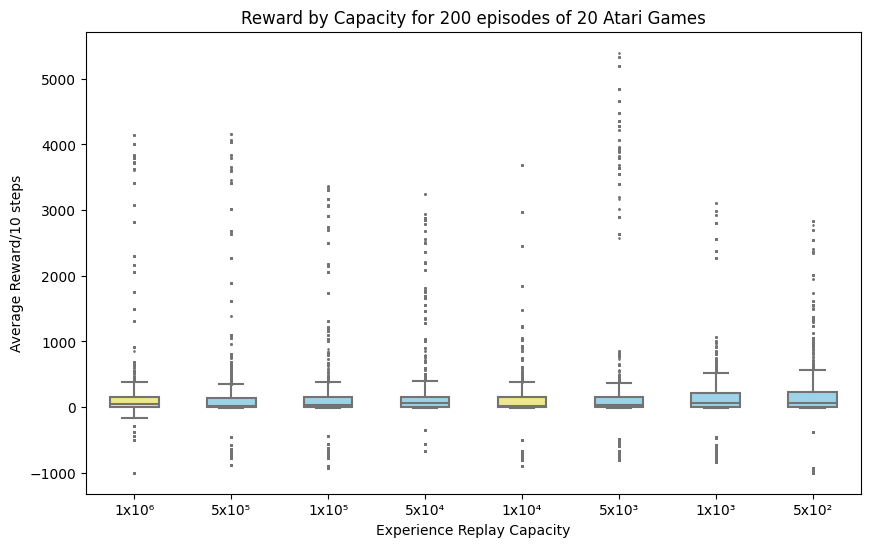


Shapiro-Wilk test
ShapiroResult(statistic=0.46251773834228516, pvalue=0.0)
0.46251773834228516
0.0

Kruskal-Wallis test
Kruskal-Wallis Test Statistic: 186.52339811943796
p-value: 8.152909749822453e-37

Dunn's Post Hoc Test
              100k           10k            1M            1k           500   
100k  1.000000e+00  1.807682e-01  1.107966e-01  4.063136e-11  2.715588e-13  \
10k   1.807682e-01  1.000000e+00  3.356862e-03  2.019361e-15  5.324741e-18   
1M    1.107966e-01  3.356862e-03  1.000000e+00  5.524643e-07  1.108884e-08   
1k    4.063136e-11  2.019361e-15  5.524643e-07  1.000000e+00  4.801635e-01   
500   2.715588e-13  5.324741e-18  1.108884e-08  4.801635e-01  1.000000e+00   
500k  9.029555e-02  7.222546e-01  1.007359e-03  1.080407e-16  2.223764e-19   
50k   6.536488e-05  9.770050e-08  1.648787e-02  9.075397e-03  9.156435e-04   
5k    1.838445e-01  9.925135e-01  3.459721e-03  2.177958e-15  5.780593e-18   

              500k           50k            5k  
100k  9.029555e-02  6.53

In [7]:
for f in files:
    fl = path+f #file location
    statisticalTesting(fl)